<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/Predictive_Maintenance_for_Machine_Failure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost kaggle


In [3]:
import pandas as pd

df = pd.read_csv("/content/ai4i2020.csv")

print(df.shape)
df.head()


(10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Drop ID columns
df = df.drop(columns=["UDI", "Product ID"])

# Encode product type
df["Type"] = df["Type"].map({"L": 0, "M": 1, "H": 2})

# Target variable
y = df["Machine failure"]
X = df.drop(columns=["Machine failure"])

print(X.shape, y.shape)


(10000, 11) (10000,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (7500, 11)
Test : (2500, 11)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Scaling done")


Scaling done


In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2415
           1       1.00      0.98      0.99        85

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500

ROC-AUC: 0.9973986116185605


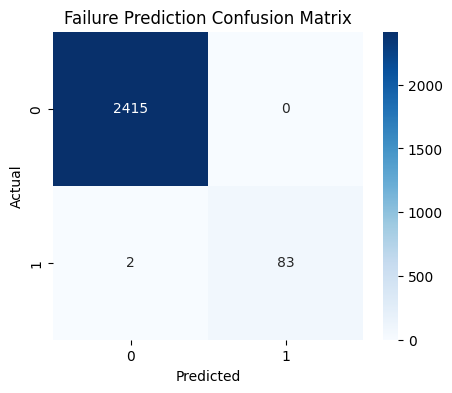

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Failure Prediction Confusion Matrix")
plt.show()


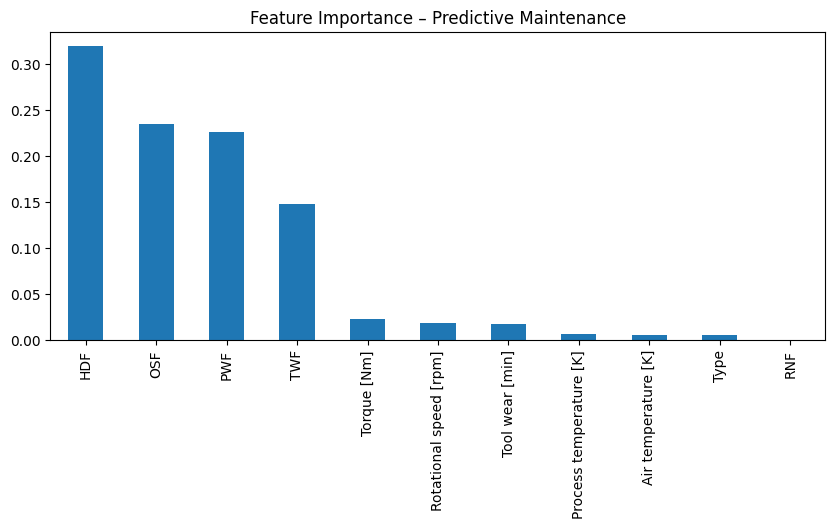

In [9]:
import numpy as np

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", figsize=(10,4))
plt.title("Feature Importance – Predictive Maintenance")
plt.show()
